# Simulated EEG multiverse

We first define the forking paths:

In [1]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ["MNE", "FieldTrip", "EEGLab"],
    "resampling": [250, 500, 512],
    "stimulation": ["IAF", "9", "10", "11"],
    "electrode": ["Pz", "O1", "O2", "P3", "P4"],
}

The template script then creates systematically varying artificial data by adding some "signal" + noise to a baseline value :

In [2]:
def analysis_template():
    import comet
    import numpy as np

    base_value = 10
    if {{software}} == "EEGlab":
        base_value += 2
    if {{stimulation}} == "IAF":
        base_value += 5
    if {{electrode}} == "Pz":
        base_value += 7
    if {{stimulation}} == "IAF" and {{electrode}} == "Pz":
        base_value += 2

    # Generate 50 outcome values (mock differences in alpha power)
    power_diffs = [base_value + np.random.normal(0, 35) for _ in range(50)]

    result = {
        "power_diffs": [round(power_diff, 3) for power_diff in power_diffs],
    }

    comet.utils.save_universe_results(result)

You can then create and visualize the multiverse:

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4
0,Universe_1,software,MNE,resampling,250,stimulation,IAF,electrode,Pz
1,Universe_2,software,MNE,resampling,250,stimulation,IAF,electrode,O1
2,Universe_3,software,MNE,resampling,250,stimulation,IAF,electrode,O2
3,Universe_4,software,MNE,resampling,250,stimulation,IAF,electrode,P3
4,Universe_5,software,MNE,resampling,250,stimulation,IAF,electrode,P4
...,...,...,...,...,...,...,...,...,...
175,Universe_176,software,EEGLab,resampling,512,stimulation,11,electrode,Pz
176,Universe_177,software,EEGLab,resampling,512,stimulation,11,electrode,O1
177,Universe_178,software,EEGLab,resampling,512,stimulation,11,electrode,O2
178,Universe_179,software,EEGLab,resampling,512,stimulation,11,electrode,P3


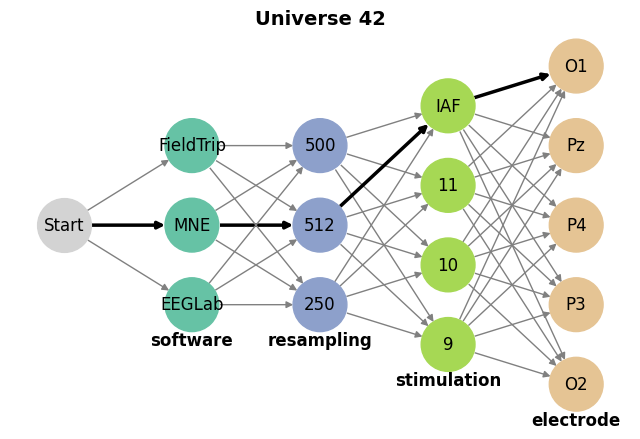

In [3]:
mverse = Multiverse(name="example_mv_eeg_sim")
mverse.create(analysis_template, forking_paths)
mverse.summary()
mverse.visualize(universe=42)

And subsequently run it:

In [4]:
mverse.run(parallel=8)

Starting multiverse analysis for all universes...


Performing multiverse analysis::   0%|          | 0/180 [00:00<?, ?it/s]

The multiverse analysis completed without any errors.


Once completed, the results can be visualised in a specification curve:

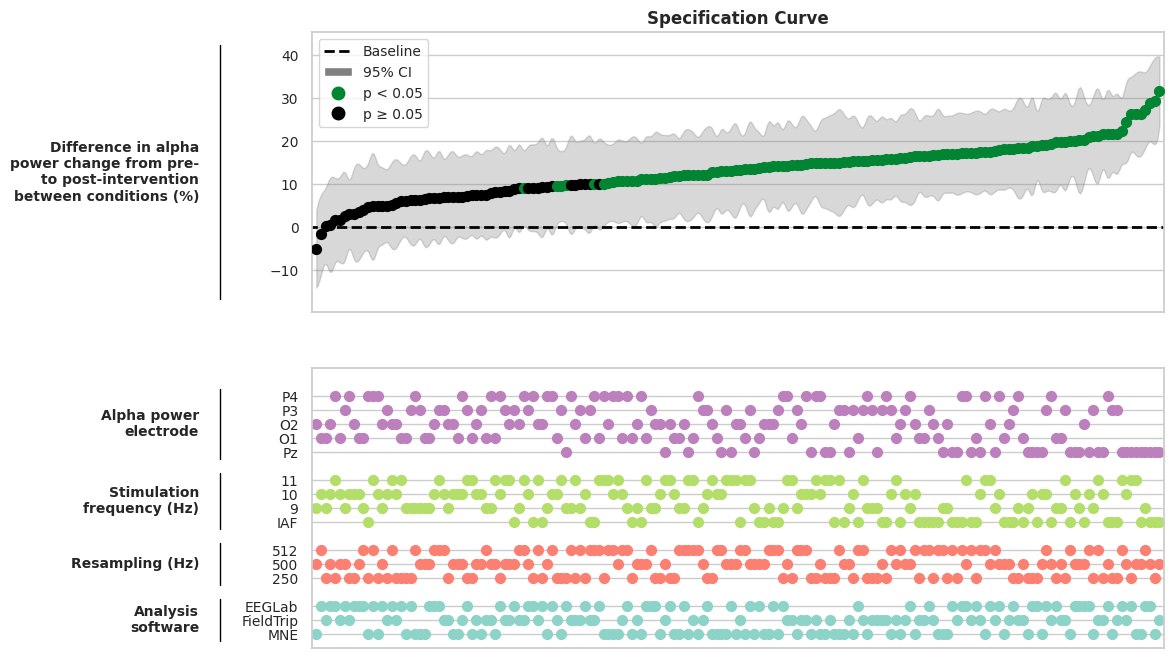

In [5]:
from matplotlib import pyplot as plt

# Custom labels for the specification curve can be provided as a dict
name_map = {
    "power_diffs": "Difference in alpha\npower change from pre-\nto post-intervention\nbetween conditions (%)",
    "software": "Analysis\nsoftware",
    "stimulation": "Stimulation\nfrequency (Hz)",
    "electrode": "Alpha power\nelectrode",
    "resampling": "Resampling (Hz)"
}
mverse.specification_curve(measure="power_diffs", name_map=name_map, p_value=0.05, ci=95, smooth_ci=True, \
                               cmap="Set3", figsize=(11,8), fontsize=10, height_ratio=[1,1], ftype="pdf")

You can access the results from the multiverse analysis for either all universes, or for a single universe:

In [6]:
results = mverse.get_results()
print(results["universe_1"]["power_diffs"])

results = mverse.get_results(universe=1)
print(results["power_diffs"])

[-19.897, 91.609, 19.371, 0.35, 11.904, 48.225, 5.552, 12.99, 56.973, -31.215, 70.255, 90.137, 36.385, 29.962, 25.736, -26.927, 13.16, -52.152, 29.87, 47.693, 58.356, 45.089, 82.1, 37.724, 53.722, 62.61, 65.53, 24.34, 33.491, -39.002, 48.695, -8.418, 79.863, 21.066, 16.394, 77.801, 3.828, -2.148, 37.942, 63.488, -8.275, -37.565, 6.055, 54.205, -11.498, 44.186, 33.196, 57.379, 71.472, 35.149]
[-19.897, 91.609, 19.371, 0.35, 11.904, 48.225, 5.552, 12.99, 56.973, -31.215, 70.255, 90.137, 36.385, 29.962, 25.736, -26.927, 13.16, -52.152, 29.87, 47.693, 58.356, 45.089, 82.1, 37.724, 53.722, 62.61, 65.53, 24.34, 33.491, -39.002, 48.695, -8.418, 79.863, 21.066, 16.394, 77.801, 3.828, -2.148, 37.942, 63.488, -8.275, -37.565, 6.055, 54.205, -11.498, 44.186, 33.196, 57.379, 71.472, 35.149]
